# Creating a 2 Layer Neural Network in 30 Lines of Python

Modified from an existing exercise. Credit for the original code to [Stanford CS 231n](http://cs231n.github.io/neural-networks-case-study/)

To demonstrate with code the math we went over earlier, we're going to generate some data that is not linearly separable, training a linear classifier, training a 2 layer neural network with a sigmoid activation function, then compare results for both.... just with plain ol Python!

## Importing Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt

### Generating a Spiral Training Dataset

We'll be using this 2D dataset because it's easy to visually see the classifier performance, and because it's impossible to linearly separate the classes nicely.

In [24]:
N = 100 # points per class
D = 2 # dimensionality at 2 so we can eyeball it
K = 3 # number of classes

X = np.zeros((N*K, D)) # generate an empty matrix to hold X features
y = np.zeros(N*K, dtype='uint8') # generate an empty vector to hold y labels

# for 3 classes, evenly generates spiral arms
for j in xrange(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0,1,N) #radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

Quick question, what are the dimensions of X and y?

Let's visualize this. Setting S=20 (size of points) so that the color/label differences are more visible.

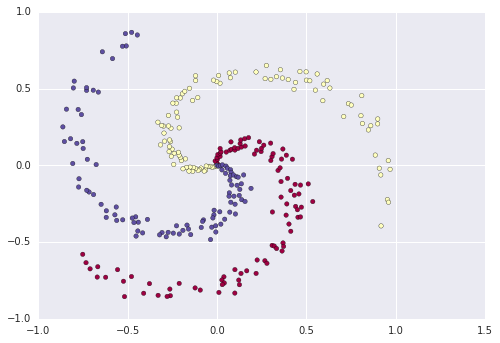

In [26]:
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap=plt.cm.Spectral)
plt.show()

### Training a Linear Classifier

Let's start by training a a simple y = WX + b linear classifer on this dataset. We need to compute some Weights (W) and a bias vector (b) for all classes.

In [28]:
# random initialization of starting params. recall that it's best to randomly initialize at a small value. 
# how many parameters should this linear classifier have? remember there are K output classes, and 2 features per observation.

W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

print "W shape", W.shape
print "W values", W

W shape (2, 3)
W values [[ 0.00588     0.00934356 -0.00479637]
 [ 0.00444381 -0.02257472 -0.00685184]]


In [49]:
# Here are some hyperparameters that we're not going to worry about too much right now

learning_rate = 1e-0 # the step size in the descent
reg = 1e-3 

In [32]:
scores = np.dot(X, W) + b
print scores.shape

(300, 3)


We're going to compute the normalized softmax of these scores...

In [40]:
num_examples = X.shape[0]

exp_scores = np.exp(scores)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

# Let's look at one example to verify the softmax transform
print "Score: ", scores[50]
print "Class Probabilities: ", probs[50]

Score:  [ 0.00083437  0.01094032  0.00036629]
Class Probabilities:  [ 0.33226022  0.33563505  0.33210473]


The array correct_logprobs is a 1D array of the probabilities assigned to the correct classes for each example. 

In [50]:
correct_logprobs = -np.log(probs[range(num_examples),y]) 

# data loss is L1 loss plus regularization loss
data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


In [45]:
# this gets the gradient of the scores

# class probabilities minus - divided by num_examples 
dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples

In [47]:
# this backpropages the gradient into W and b
dW = np.dot(X.T, dscores) # don't forget to transpose! otherwise, you'll be forwarding the gradient
dW += 0.5*W # regularization gradient

db = np.sum(dscores, axis=0, keepdims=True) 

#### Updating the Parameters

We update the parameters W and B in the direction of the negative gradient in order to decrease the loss.

In [51]:
# this updates the W and b parameters
W += -learning_rate * dW
b += -learning_rate * db

### Full Code for the Training the Linear Softmax Classifier

Using gradient descent method for optimization. 

Using L1 for loss funtion. 

This ought to converge to a loss of around 0.78 after 150 iterations

In [52]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]

# evaluated for 200 steps
for i in xrange(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  
  # for every 10 iterations print the loss
  if i % 10 == 0:
    print "iteration %d: loss %f" % (i, loss)
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.099082
iteration 10: loss 0.908940
iteration 20: loss 0.838382
iteration 30: loss 0.806321
iteration 40: loss 0.789646
iteration 50: loss 0.780173
iteration 60: loss 0.774456
iteration 70: loss 0.770854
iteration 80: loss 0.768509
iteration 90: loss 0.766945
iteration 100: loss 0.765881
iteration 110: loss 0.765146
iteration 120: loss 0.764633
iteration 130: loss 0.764270
iteration 140: loss 0.764012
iteration 150: loss 0.763827
iteration 160: loss 0.763693
iteration 170: loss 0.763596
iteration 180: loss 0.763526
iteration 190: loss 0.763474


#### Evaluating the Training Accuracy

The training accuracy here ought to be at around 0.5

This is better than change for 3 classes, where the expected accuracy of randomly selecting one of out 3 labels is 0.33. But not that much better.

In [54]:
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.51


Let's eyeball the decision boundaries to get a better feel for the split. 

(-1.8553713056219479, 1.8646286943780555)

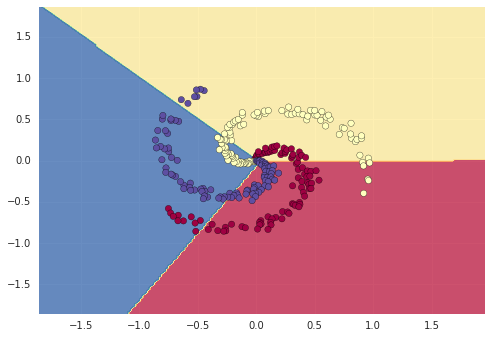

In [55]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Training a 2 Layer Neural Network

Let's see what kind of improvement we'll get with adding a single hidden layer. 

In [56]:
# init parameters 

np.random.seed(100) # so we all have the same numbers

W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))

h = 100 # size of hidden layer. a hyperparam in itself.
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

Let's use a ReLU activation function. See how we're passing the scores from one layer into the hidden layer. 

In [61]:
hidden_layer = np.maximum(0, np.dot(X, W) + b) 
scores = np.dot(hidden_layer, W2) + b2

The loss computation and the `dscores` gradient computation remain the same. The major difference lies in the the chaining backpropagation of the `dscores` all the way back up to the parameters `W` and `b`.

In [ ]:
# backpropate the gradient to the parameters of the hidden layer
dW2 = np.dot(hidden_layer.T, dscores)
db2 = np.sum(dscores, axis=0, keepdims=True)

# gradient of the outputs of the hidden layer (the local gradient)
dhidden = np.dot(dscores, W2.T)

# backprop through the ReLU function
dhidden[hidden_layer <= 0] = 0

# back right into the parameters W and b
dW = np.dot(X.T, dhidden)
db = np.sum(dhidden, axis=0, keepdims=True)

### Full Code for Training the 2 Layer NN with ReLU activation

Very similar to the linear classifier!

In [58]:
# initialize parameters randomly

np.random.seed(100) # so we all have the same numbers

h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength


# optimization: gradient descent loop
num_examples = X.shape[0]
for i in xrange(10000):
  
  # feed forward 
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print "iteration %d: loss %f" % (i, loss)
  
  # backprop 
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098447
iteration 1000: loss 0.308731
iteration 2000: loss 0.263159
iteration 3000: loss 0.246505
iteration 4000: loss 0.243653
iteration 5000: loss 0.242297
iteration 6000: loss 0.241650
iteration 7000: loss 0.241192
iteration 8000: loss 0.240871
iteration 9000: loss 0.240666


### Evaluating the Training Set Accuracy

This should be around 0.98, which is hugely better than the 0.50 we were getting from the linear classifier!

In [59]:
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2

predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))

training accuracy: 0.98


Let's visualize this to get a more dramatic sense of just how good the split is.

(-1.8553713056219479, 1.8646286943780555)

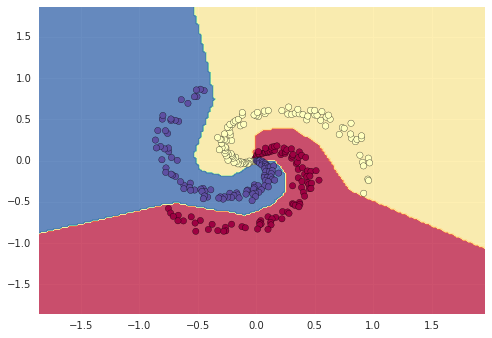

In [60]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')

## Now Try: 

* Generating another couple of arms in the dataset by modifying K and testing the classifiers on the new dataset
* Change the hyperparameters, see how many iterations it takes to for the classifier to roughly converge. 
* Change the learning rate to a really high number, observe the iterations to convergence.
* Change the activation function, loss scoring, or optimization method
* Add a 3rd hidden layer 